# Flow Sorting with FSCparser

FSCparser is an open source software for reading flow data from FCS files [https://github.com/eyurtsev/fcsparser]. To install it, open the command line and run `pip install fcsparser`.  
  
In this demo I walk through:  
- Loading an fcs file
- Gating on cell size, doublets, and GFP+ and GFP-

In [2]:
# import libraries

import fcsparser
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## Load the data

In [3]:
path = "sample_data.fcs"
meta, all_events = fcsparser.parse(path, reformat_meta=True)

## Plot the data - Forward scatter and side scatter
The plot below is a plot of the raw data as recorded in the file. Specifically, no compensation or transformation has been applied to this data.

To better visualize this data you might want to take a look at either hlog or logicle transformations.

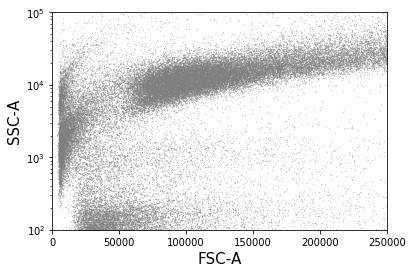

In [4]:
## data set
df = all_events

## axis specification
xax = 'FSC-A'
yax = 'SSC-A'

## plot the data
fig, ax = plt.subplots()
ax.scatter(df[xax], df[yax], s=0.1, alpha=0.5, color='grey')
ax.set_xlabel(xax, fontsize = 15)
ax.set_ylabel(yax, fontsize = 15)
ax.set_xlim(0, 250000)
ax.set_ylim(100, 100000)
ax.set_xscale('linear')
ax.set_yscale("log", nonposy='clip')

plt.show()

### Gate 1 - Forward scatter and side scatter
Draw the gates using a rectangle plot, as shown below. Adjust the corrdinates as necessary to select the appropriate region. Later these coordinates are used to take a slice of the data set. This is the general logic for all of the gates

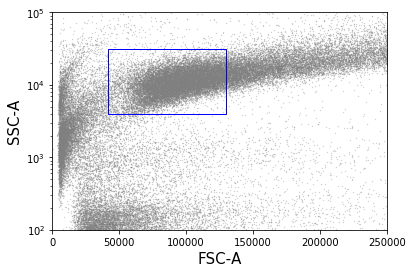

In [5]:
## data set
df = all_events

## axis specification
xax = 'FSC-A'
yax = 'SSC-A'

# forward scatter
fsc_a_min = 42000
fsc_a_max = 130000
# side scatter
ssc_a_min = 3900
ssc_a_max = 31000


## plot the data
fig, ax = plt.subplots()
ax.scatter(df[xax], df[yax], s=0.1, alpha=0.5, color='grey')
ax.set_xlabel(xax, fontsize = 15)
ax.set_ylabel(yax, fontsize = 15)
ax.set_xlim(0, 250000)
ax.set_ylim(100, 100000)
ax.set_xscale('linear')
ax.set_yscale("log", nonposy='clip')

## plot the gate
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((fsc_a_min, ssc_a_min), 
                                (fsc_a_max - fsc_a_min), 
                                (ssc_a_max - ssc_a_min), 
                                edgecolor="blue", 
                                fill=False))
plt.show()

In [6]:
## subset the data based on the first gate
# requires variables from the function above
gate1 = df
gate1 = gate1.loc[gate1[xax] > fsc_a_min]
gate1 = gate1.loc[gate1[xax] < fsc_a_max]
gate1 = gate1.loc[gate1[yax] > ssc_a_min]
gate1 = gate1.loc[gate1[yax] < ssc_a_max]

## calcuate the percent of the total events in the first gate            
per_gate_1 = ((len(gate1) + 1) / (len(df) + 1)) * 100
print("Gate 1, percent of data:",per_gate_1)

Gate 1, percent of data: 25.26633138654553


### Gate 2- Doublet Sorting

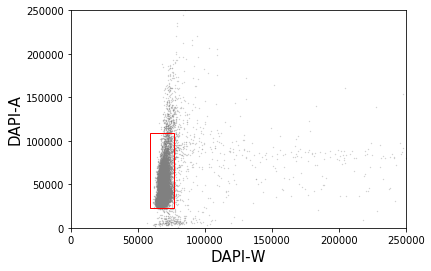

In [7]:
# use the data from the fsc and ssc gate above
df = gate1

## axis specification
xax = 'DAPI-W'
yax = 'DAPI-A'

# dapi width
dapi_w_min = 59000
dapi_w_max = 77000
# dapi area
dapi_a_min = 23000
dapi_a_max = 109000

## plot controls
fig, ax = plt.subplots()
ax.scatter(df[xax], df[yax], s=0.1, alpha=0.5, color='grey')
ax.set_xlabel(xax, fontsize = 15)
ax.set_ylabel(yax, fontsize = 15)
ax.set_xlim(0, 250000)
ax.set_ylim(0, 250000)
ax.set_xscale('linear')
ax.set_yscale("linear", nonposy='clip')

## plot the gate
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((dapi_w_min, dapi_a_min), 
                                (dapi_w_max - dapi_w_min), 
                                (dapi_a_max - dapi_a_min), 
                                edgecolor="red", 
                                fill=False))
plt.show()

In [8]:
## subset the data based on the first gate
# requires variables from the function above
gate2 = gate1
gate2 = gate2.loc[gate1[xax] > dapi_w_min]
gate2 = gate2.loc[gate1[xax] < dapi_w_max]
gate2 = gate2.loc[gate1[yax] > dapi_a_min]
gate2 = gate2.loc[gate1[yax] < dapi_a_max]

## calcuate the percent of the total events in the first gate            
per_gate_2 = ((len(gate2) + 1) / (len(gate1) + 1)) * 100
print("Gate 2, percent of data:", per_gate_2)

Gate 2, percent of data: 92.58922360746963


### GFP filtering

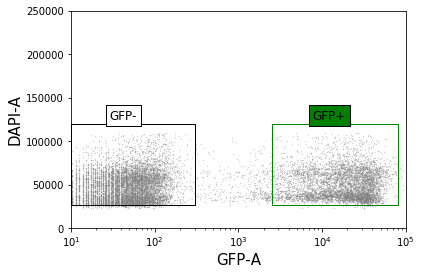

In [9]:
## data frame
df = gate2

## axis specification
xax = 'GFP-A'
yax = 'DAPI-A'


## GFP - gate
# forward scatter
gfp_a_min1 = 10
gfp_a_max1 = 300
# side scatter
dapi_a_min = 26000
dapi_a_max = 120000

## GFP + gate
# forward scatter
gfp_a_min2 = 2500
gfp_a_max2 = 80000
# side scatter
dapi_a_min = 26000
dapi_a_max = 120000


## plot the data
fig, ax = plt.subplots()
ax.scatter(df[xax], df[yax], s=0.1, alpha=0.5, color='gray')
ax.set_xlabel(xax, fontsize = 15)
ax.set_ylabel(yax, fontsize = 15)
ax.set_xlim(10, 100000)
ax.set_ylim(0, 250000)
ax.set_xscale("log")
ax.set_yscale("linear", nonposy='clip')

## plot the gates
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((gfp_a_min1, dapi_a_min), 
                                (gfp_a_max1 - gfp_a_min1), 
                                (dapi_a_max - dapi_a_min), 
                                edgecolor="black", 
                                fill=False))

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((gfp_a_min2, dapi_a_min), 
                                (gfp_a_max2 - gfp_a_min2), 
                                (dapi_a_max - dapi_a_min), 
                                edgecolor="green", 
                                fill=False))

x = (gfp_a_max1 - gfp_a_min1) / 10
y = dapi_a_max + 5000
s = "GFP-"
currentAxis.text(x, y, s, fontsize=12, bbox=dict(facecolor='white'))

x = (gfp_a_max2 - gfp_a_min2) / 10
y = dapi_a_max + 5000
s = "GFP+"
currentAxis.text(x, y, s, fontsize=12, bbox=dict(facecolor='green'))


plt.show()

In [10]:
## GFP- gate
gate3 = gate2
gate3 = gate3.loc[gate1[xax] > gfp_a_min1]
gate3 = gate3.loc[gate1[xax] < gfp_a_max1]
gate3 = gate3.loc[gate1[yax] > dapi_a_min]
gate3 = gate3.loc[gate1[yax] < dapi_a_max]

## GFP+ gate
gate4 = gate2
gate4 = gate4.loc[gate1[xax] > gfp_a_min2]
gate4 = gate4.loc[gate1[xax] < gfp_a_max2]
gate4 = gate4.loc[gate1[yax] > dapi_a_min]
gate4 = gate4.loc[gate1[yax] < dapi_a_max]

## calcuate the percent of the total events in the first gate            
per_gate_3 = ((len(gate3) + 1) / (len(gate2) + 1)) * 100
per_gate_4 = ((len(gate4) + 1) / (len(gate2) + 1)) * 100

print("Percent GFP- cells:", per_gate_3, "\nPercent GFP+ cells:", per_gate_4)
print("Note that some cells in the middle might be uncounted")

Percent GFP- cells: 43.64886731391586 
Percent GFP+ cells: 31.010171058714747
Note that some cells in the middle might be uncounted


## To save a plot:
Copy the plot code below and change the file name. Should save to the directory where the code is being run.

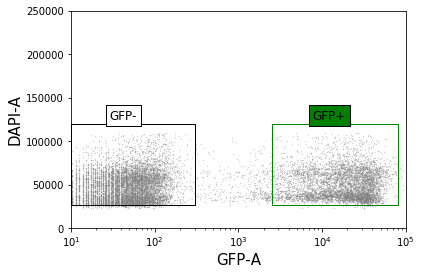

In [11]:
# change to .file_format if PDF is not your style
save_name = 'sample_plot.pdf'


## data frame
df = gate2

## axis specification
xax = 'GFP-A'
yax = 'DAPI-A'


## GFP - gate
# forward scatter
gfp_a_min1 = 10
gfp_a_max1 = 300
# side scatter
dapi_a_min = 26000
dapi_a_max = 120000

## GFP + gate
# forward scatter
gfp_a_min2 = 2500
gfp_a_max2 = 80000
# side scatter
dapi_a_min = 26000
dapi_a_max = 120000


## plot the data
fig, ax = plt.subplots()
ax.scatter(df[xax], df[yax], s=0.1, alpha=0.5, color='gray')
ax.set_xlabel(xax, fontsize = 15)
ax.set_ylabel(yax, fontsize = 15)
ax.set_xlim(10, 100000)
ax.set_ylim(0, 250000)
ax.set_xscale("log")
ax.set_yscale("linear", nonposy='clip')

## plot the gates
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((gfp_a_min1, dapi_a_min), 
                                (gfp_a_max1 - gfp_a_min1), 
                                (dapi_a_max - dapi_a_min), 
                                edgecolor="black", 
                                fill=False))

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((gfp_a_min2, dapi_a_min), 
                                (gfp_a_max2 - gfp_a_min2), 
                                (dapi_a_max - dapi_a_min), 
                                edgecolor="green", 
                                fill=False))

x = (gfp_a_max1 - gfp_a_min1) / 10
y = dapi_a_max + 5000
s = "GFP-"
currentAxis.text(x, y, s, fontsize=12, bbox=dict(facecolor='white'))

x = (gfp_a_max2 - gfp_a_min2) / 10
y = dapi_a_max + 5000
s = "GFP+"
currentAxis.text(x, y, s, fontsize=12, bbox=dict(facecolor='green'))

plt.savefig(save_name, bbox_inches='tight')

plt.show()